In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL
import glob

In [2]:
print('Current working directory: ',os.getcwd())

Current working directory:  C:\Users\Shimul\Documents\Building CSE 4000 Thesis\Defense 27_03_2022


## Dataset path location using glob

In [6]:
building_house_dataset='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/DATASET/brick_house'
mosque_dataset='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/DATASET/mosque'
temple_dataset='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/DATASET/temple'
tinshed_dataset='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/DATASET/tinshed'
skyscraper_dataset='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/DATASET/skyscraper'
mud_house_dataset='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/DATASET/mud_house'

In [7]:
brick_house=glob.glob('DATASET/brick_house/*.*')
mosque=glob.glob('DATASET/mosque/*.*')
temple=glob.glob('DATASET/temple/*.*')
tinshed=glob.glob('DATASET/tinshed/*.*')
skyscraper=glob.glob('DATASET/skyscraper/*.*')
mud_house=glob.glob('DATASET/mud_house/*.*')

In [8]:
print('brick_house data : ',len(brick_house))
print('Mosque data: ',len(mosque))
print('Temple data: ',len(temple))
print('Tinshed data: ',len(tinshed))
print('skyscraper data: ',len(skyscraper))
print('Mud house data: ',len(mud_house))

brick_house data :  250
Mosque data:  250
Temple data:  250
Tinshed data:  250
skyscraper data:  250
Mud house data:  250


## Dataset Preprocessing using ImageDataGenerator

In [9]:
train_path='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/DATASET/train'
test_path='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/DATASET/test'
print(os.listdir(train_path))
print(os.listdir(test_path))

['brick_house', 'mosque', 'mud_house', 'skyscraper', 'temple', 'tinshed']
['brick_house', 'mosque', 'mud_house', 'skyscraper', 'temple', 'tinshed']


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
WIDTH=224
HEIGHT=224

In [10]:
train_generator = ImageDataGenerator(rescale=1./255,
                                    #horizontal_flip=True,
                                    #shear_range=0.1 ,
                                    #zoom_range=0.1,
                                    #rotation_range=20,
                                    #height_shift_range=0.1,
                                    fill_mode='nearest',
                                    validation_split=0.2)
                                     
train_dataset = train_generator.flow_from_directory(batch_size=32,
                                                 directory=train_path,
                                                 shuffle=True,
                                                 target_size=(WIDTH, HEIGHT),
                                                 class_mode='categorical',
                                                 subset='training')

validation_dataset = train_generator.flow_from_directory(batch_size=32,
                                                 directory=train_path,
                                                 shuffle=True,
                                                 target_size=(WIDTH, HEIGHT), 
                                                 class_mode='categorical',
                                                 subset='validation')

Found 960 images belonging to 6 classes.
Found 240 images belonging to 6 classes.


In [11]:
test_generator=ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory(batch_size=32,
                                                 directory=test_path,
                                                 shuffle=False,
                                                 target_size=(WIDTH, HEIGHT), 
                                                 class_mode='categorical')

Found 300 images belonging to 6 classes.


In [12]:
train_dataset.class_indices

{'brick_house': 0,
 'mosque': 1,
 'mud_house': 2,
 'skyscraper': 3,
 'temple': 4,
 'tinshed': 5}

In [13]:
validation_dataset.class_indices

{'brick_house': 0,
 'mosque': 1,
 'mud_house': 2,
 'skyscraper': 3,
 'temple': 4,
 'tinshed': 5}

In [14]:
test_dataset.class_indices

{'brick_house': 0,
 'mosque': 1,
 'mud_house': 2,
 'skyscraper': 3,
 'temple': 4,
 'tinshed': 5}

In [15]:
total_class=len(train_dataset.class_indices)
print('Number of classes in dataset: ',total_class)

Number of classes in dataset:  6


## Plot some random image
- class 0: brick house
- class 1: mosque
- class 2: mud house
- class 3: skyscraper
- class 4: temple
- class 5: tinshed

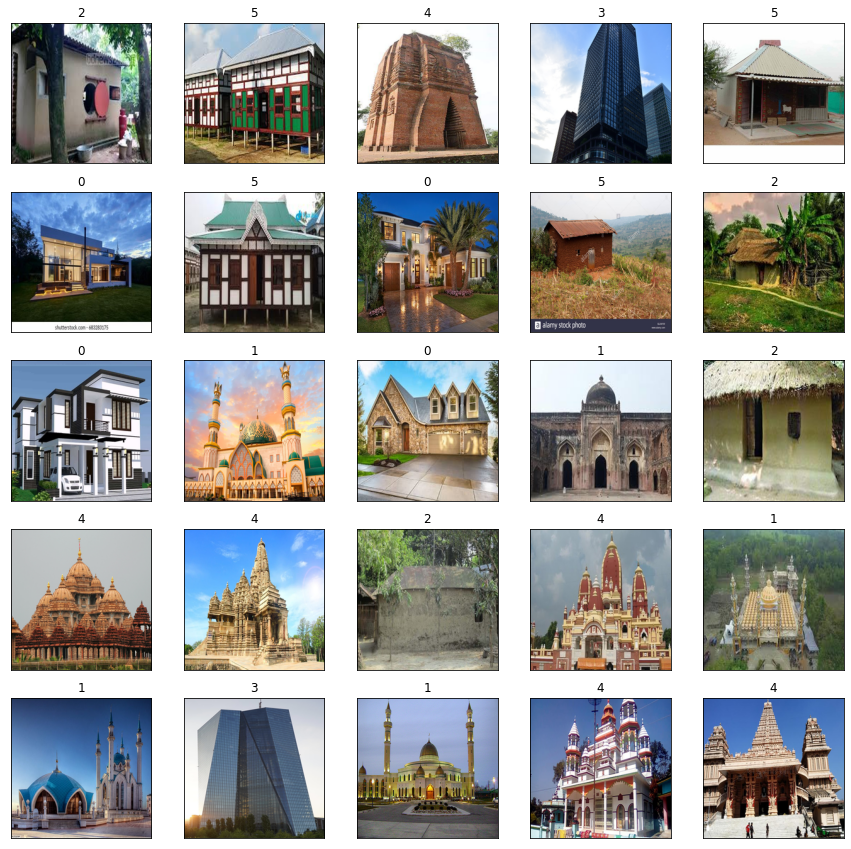

In [16]:
x,y=train_dataset.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

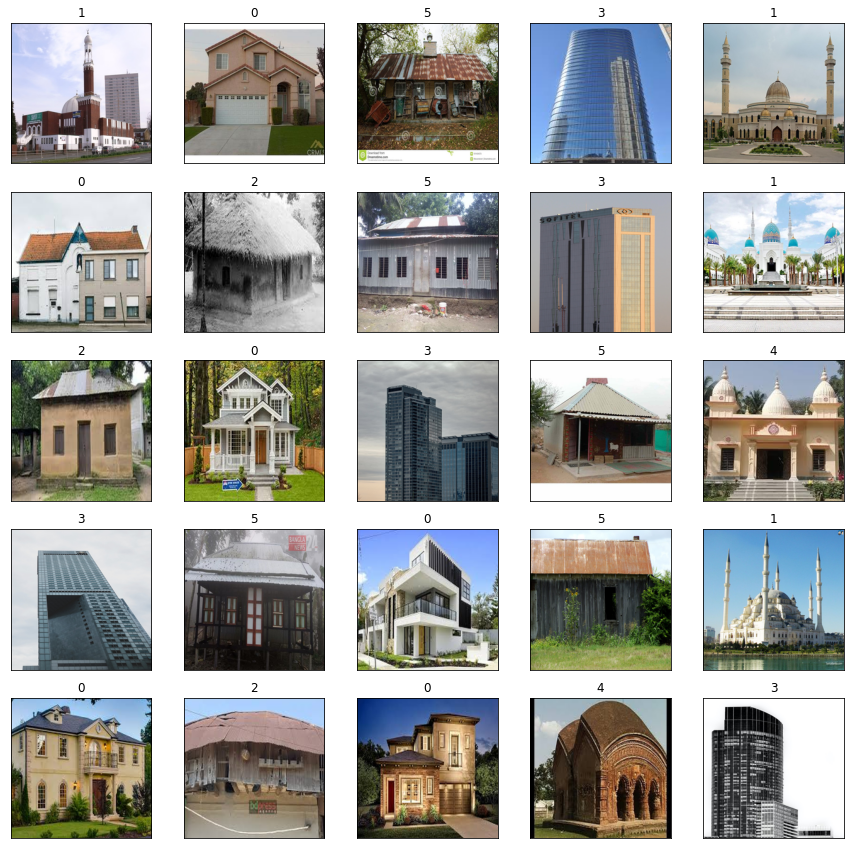

In [17]:
x,y=validation_dataset.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

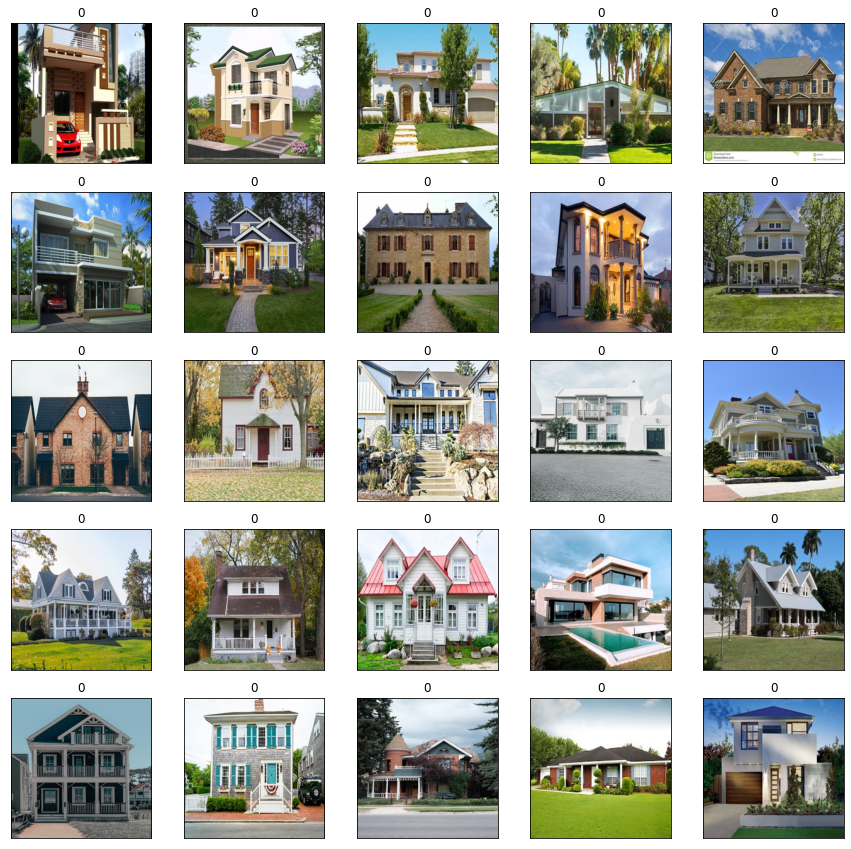

In [18]:
x,y=test_dataset.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

## Import DenseNet

In [18]:
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras import layers
import tensorflow as tf

In [19]:
base_model=DenseNet121(input_shape=(224,224,3),include_top=False)

In [20]:
base_model.trainable = False

In [21]:
total_class

6

In [22]:
model = tf.keras.Sequential([
  base_model,
  layers.GlobalAveragePooling2D(),
  layers.Dense(total_class,activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 7, 7, 1024)        7037504   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 6150      
Total params: 7,043,654
Trainable params: 6,150
Non-trainable params: 7,037,504
_________________________________________________________________


In [23]:
#base_model.summary()

## Compile the model

In [24]:
model.compile( loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## Trained the model

In [25]:
epochs=50
batch_size=32
trainset_length=len(train_dataset.labels)
validation_length=len(validation_dataset.labels)
steps_per_epoch=(trainset_length//batch_size)
validation_steps=(validation_length//batch_size)
print(trainset_length)
print(validation_length)
print(steps_per_epoch)
print(validation_steps)

960
240
30
7


In [26]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='Models/DenseNet_building.model.best.hdf5', verbose=1 ,save_best_only=True)

In [27]:
history = model.fit(train_dataset,
                    steps_per_epoch = steps_per_epoch,
                    epochs=epochs,
                    validation_data=validation_dataset,
                    validation_steps=validation_steps,callbacks=[checkpointer])

Epoch 1/50
30/30 [==============================] - ETA: 0s - loss: 1.4909 - accuracy: 0.3948
Epoch 00001: val_loss improved from inf to 0.94022, saving model to Models\DenseNet_building.model.best.hdf5
30/30 [==============================] - 108s 4s/step - loss: 1.4909 - accuracy: 0.3948 - val_loss: 0.9402 - val_accuracy: 0.7321
Epoch 2/50
30/30 [==============================] - ETA: 0s - loss: 0.6152 - accuracy: 0.8438
Epoch 00002: val_loss improved from 0.94022 to 0.40979, saving model to Models\DenseNet_building.model.best.hdf5
30/30 [==============================] - 111s 4s/step - loss: 0.6152 - accuracy: 0.8438 - val_loss: 0.4098 - val_accuracy: 0.8973
Epoch 3/50
30/30 [==============================] - ETA: 0s - loss: 0.3487 - accuracy: 0.9104
Epoch 00003: val_loss improved from 0.40979 to 0.28758, saving model to Models\DenseNet_building.model.best.hdf5
30/30 [==============================] - 110s 4s/step - loss: 0.3487 - accuracy: 0.9104 - val_loss: 0.2876 - val_accuracy: 

30/30 [==============================] - ETA: 0s - loss: 0.0474 - accuracy: 0.9990
Epoch 00028: val_loss did not improve from 0.13563
30/30 [==============================] - 103s 3s/step - loss: 0.0474 - accuracy: 0.9990 - val_loss: 0.1558 - val_accuracy: 0.9420
Epoch 29/50
30/30 [==============================] - ETA: 0s - loss: 0.0468 - accuracy: 0.9969
Epoch 00029: val_loss did not improve from 0.13563
30/30 [==============================] - 104s 3s/step - loss: 0.0468 - accuracy: 0.9969 - val_loss: 0.1583 - val_accuracy: 0.9375
Epoch 30/50
30/30 [==============================] - ETA: 0s - loss: 0.0429 - accuracy: 1.0000
Epoch 00030: val_loss did not improve from 0.13563
30/30 [==============================] - 103s 3s/step - loss: 0.0429 - accuracy: 1.0000 - val_loss: 0.1398 - val_accuracy: 0.9464
Epoch 31/50
30/30 [==============================] - ETA: 0s - loss: 0.0418 - accuracy: 0.9990
Epoch 00031: val_loss did not improve from 0.13563
30/30 [==============================]

## Plot Accuracy and Loss Graph

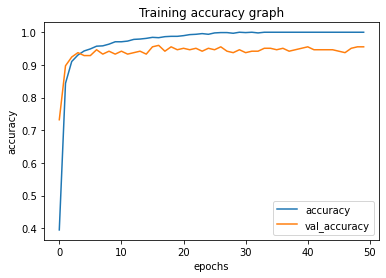

In [28]:
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training accuracy graph')
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

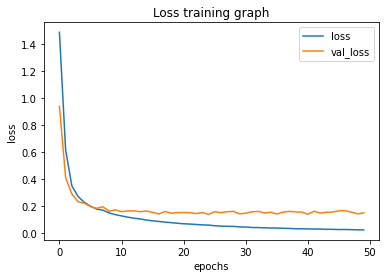

In [29]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss training graph')
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

## Softmax activation fuction

three class labels will be integer encoded as 0, 1, and 2. Then encoded to vectors as follows:

- Class 0: [1, 0, 0]
- Class 1: [0, 1, 0]
- Class 2: [0, 0, 1]

The softmax output might look as follows, which puts the most weight on class 1 and less weight on the other classes.

[0.09003057 0.66524096 0.24472847] -> [0,1,0]

<b>equaltion</b> e^z/sum (e^z1,...,e^zn)

## Adam optimzer

Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

According to Kingma et al., 2014, the method is "computationally efficient, has little memory requirement, invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters".

## Save Model h5 format
This file includes
- Model architecture
- Model weight values during training
- model training config 
- optimizer 

In [46]:
import time
t = time.time()

export_path_keras = "Saved Model/DenseNet_{}_model_{}.h5".format(test_accuracy,int(t))
print(export_path_keras)
model.save(export_path_keras)

Saved Model/DenseNet_0.8933333158493042_model_1619676807.h5


## Reload the model h5 format

In [20]:
from tensorflow.keras.models import load_model

In [22]:
model_path='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/SavedModel/DenseNet_0.8933333158493042_model_1619676807.h5'
reload_model=load_model(model_path)
reload_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 7, 7, 1024)        7037504   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 6150      
Total params: 7,043,654
Trainable params: 6,150
Non-trainable params: 7,037,504
_________________________________________________________________


In [23]:
model=reload_model

In [25]:
test_loss,test_accuracy=model.evaluate(test_dataset)

10/10 [==============================] - 19s 2s/step - loss: 0.2894 - accuracy: 0.8933


In [26]:
print('Accuracy of the model is : ',test_accuracy*100)
print('Loss of the model is : ',test_loss)

Accuracy of the model is :  89.33333158493042
Loss of the model is :  0.2893948256969452


## Classification Report

In [27]:
predicted_result=model.predict(test_dataset)
predicted_result[:5]

array([[3.3274293e-04, 4.9782454e-08, 2.9608125e-07, 2.5531713e-07,
        8.6781000e-08, 2.7635694e-04],
       [5.8725029e-02, 3.4576790e-06, 5.7949222e-07, 1.4017964e-07,
        7.4288164e-07, 6.9349958e-06],
       [8.0899298e-03, 1.5830994e-04, 2.8834513e-05, 6.2285392e-07,
        5.0147530e-05, 6.1759065e-06],
       [1.1544824e-03, 1.6186647e-06, 1.9276549e-06, 1.3486820e-07,
        2.2988328e-07, 7.9604983e-04],
       [3.7774980e-02, 4.9687947e-07, 2.1821556e-08, 8.9983121e-07,
        1.3139329e-05, 5.2553415e-04]], dtype=float32)

In [28]:
predicted_result.shape

(300, 6)

In [29]:
predicted_value=np.argmax(model.predict(test_dataset),axis=-1)
predicted_value

array([0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0,
       0, 0, 0, 5, 5, 0, 5, 0, 5, 5, 0, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4,
       4, 0, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 2, 0, 5, 5, 5, 5, 5, 5, 5, 2,
       5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], d

In [30]:
test_value=test_dataset.classes
test_value

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [31]:
from sklearn.metrics import accuracy_score
print('Accuracy score: ',accuracy_score(test_dataset.classes,predicted_value))

Accuracy score:  0.8933333333333333


In [35]:
from sklearn.metrics import classification_report
print('classification report \n',classification_report(test_dataset.classes,predicted_value))

classification report 
               precision    recall  f1-score   support

           0       0.84      0.64      0.73        50
           1       0.96      0.94      0.95        50
           2       0.96      0.96      0.96        50
           3       0.98      1.00      0.99        50
           4       0.98      0.92      0.95        50
           5       0.69      0.90      0.78        50

    accuracy                           0.89       300
   macro avg       0.90      0.89      0.89       300
weighted avg       0.90      0.89      0.89       300



In [34]:
from sklearn.metrics import confusion_matrix
cm_matrix=confusion_matrix(test_dataset.classes,predicted_value)
cm_matrix

array([[32,  0,  0,  0,  0, 18],
       [ 1, 47,  0,  1,  1,  0],
       [ 0,  0, 48,  0,  0,  2],
       [ 0,  0,  0, 50,  0,  0],
       [ 2,  2,  0,  0, 46,  0],
       [ 3,  0,  2,  0,  0, 45]], dtype=int64)

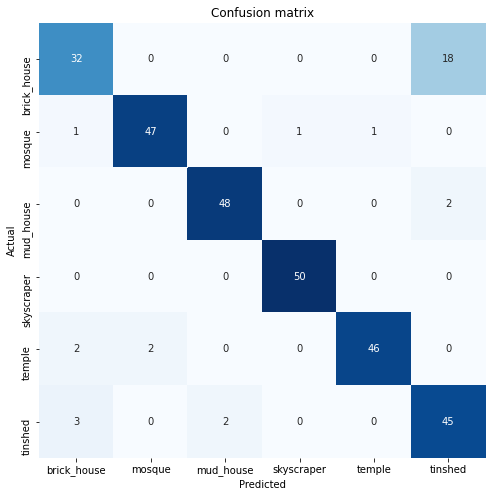

In [36]:
classnames = ['brick_house', 'mosque','mud_house', 'skyscraper', 'temple', 'tinshed']
import seaborn as sns
plt.figure(figsize=(8,8))
plt.title('Confusion matrix')
sns.heatmap(cm_matrix, cbar=False, xticklabels=classnames, yticklabels=classnames, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


- class 0: brick house
- class 1: mosque
- class 2: mud house
- class 3: skyscraper
- class 4: temple
- class 5: tinshed

## Experiment on random image

In [38]:
from tensorflow.keras.preprocessing import image

(1, 224, 224, 3)
[[1.3306439e-03 1.4230807e-06 4.3327731e-07 3.8283326e-07 2.1332667e-07
  7.6269243e-06]]
0


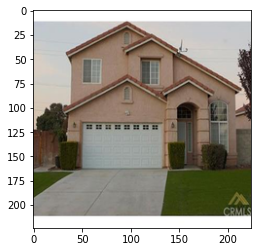

In [39]:
image_path='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/Images/brick_house1.png'
random_image=image.load_img(image_path,target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[1.1876735e-07 9.4735205e-01 3.4859096e-07 2.2201289e-06 5.5171124e-05
  3.8343249e-09]]
1


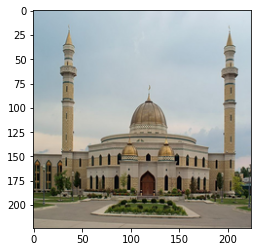

In [40]:
image_path='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/Images/mosque0.png'
random_image=image.load_img(image_path,target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[7.6364659e-06 2.0648116e-01 1.6899332e-07 1.7417069e-06 2.0663440e-03
  3.5843043e-06]]
1


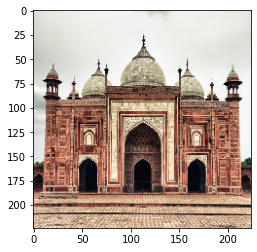

In [41]:
image_path='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/Images/mosque35.png'
random_image=image.load_img(image_path,target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[2.4306727e-08 7.5813062e-09 1.4303851e-01 2.2925054e-11 9.1993223e-07
  1.5752164e-09]]
2


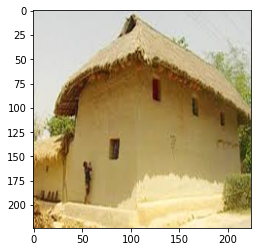

In [42]:
image_path='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/Images/mud72.png'
random_image=image.load_img(image_path,target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[6.9176435e-06 4.2863645e-05 3.2120872e-07 8.6467361e-01 1.0084005e-08
  7.3204126e-07]]
3


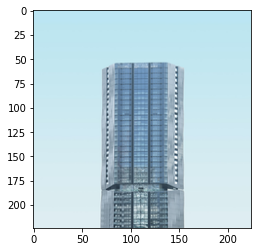

In [43]:
image_path='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/Images/sky79.png'
random_image=image.load_img(image_path,target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[1.8787119e-08 6.6557899e-05 1.3850956e-06 2.9698506e-09 7.2346473e-01
  2.2147194e-08]]
4


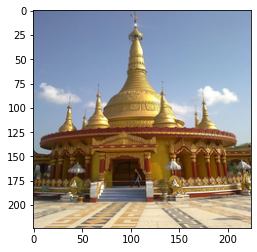

In [44]:
image_path='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/Images/temple33.png'
random_image=image.load_img(image_path,target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[1.5349724e-06 1.0613179e-07 6.2076593e-09 3.0853670e-08 3.2105925e-07
  3.1781197e-04]]
5


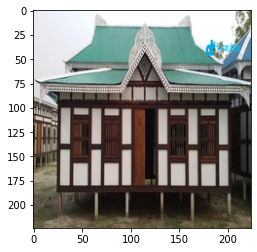

In [45]:
image_path='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/Images/tinshed25.png'
random_image=image.load_img(image_path,target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[3.3470988e-04 8.4814429e-04 8.1073017e-07 2.4830436e-07 1.1625707e-01
  5.0160558e-08]]
4


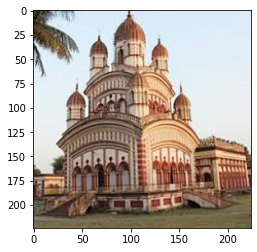

In [46]:
image_path='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/Images/temple72.png'
random_image=image.load_img(image_path,target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[5.1233663e-08 2.5869370e-02 1.7007577e-07 2.0788575e-07 7.7438354e-04
  4.6889276e-08]]
1


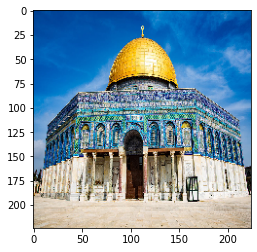

In [47]:
image_path='C:/Users/Shimul/Documents/Building CSE 4000 Thesis/Defense 27_03_2022/Images/Ismlaic-Architecture12.jpg'
random_image=image.load_img(image_path,target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

## Experiment with reload model h5 format

In [49]:
print(len(reload_model.weights))
print(reload_model.output_shape)

606
(None, 6)


In [50]:
reload_model.layers

## Export as SavedModel
 SavedModel is a standalone serialization format for Tensorflow objects, supported by TensorFlow serving as well as TensorFlow implementations other than Python. A SavedModel contains a complete TensorFlow program, including weights and computation. It does not require the original model building code to run, which makes it useful for sharing or deploying (with TFLite, TensorFlow.js, TensorFlow Serving, or TFHub)
- A TensorFlow checkpoint containing the model weights
- Model architecture config

In [51]:
t = time.time()

export_path_sm = "Saved Model/TL DenseNet {} Model {}".format(test_accuracy,int(t))
print(export_path_sm)

tf.saved_model.save(model, export_path_sm)

Saved Model/TL DenseNet 0.8933333158493042 Model 1619676815
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Saved Model/TL DenseNet 0.8933333158493042 Model 1619676815\assets


## Load SavedModel

In [52]:
reload_tf_saved_model=tf.saved_model.load(export_path_sm)

In [53]:
reload_tf_saved_model.signatures['serving_default']

<ConcreteFunction signature_wrapper(densenet121_input) at 0x1DA9E692460>

In [54]:
reload_tf_saved_model

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x1db0d491610>

## Classification report

In [3]:
model=reload_model